# Spotify Song Data Analysis
## Executive Summary
Spotify is one of the most popular music streaming services in the world. Spotify it self have a comprehensive and publicly available data for their entire library. The data include basic information about the songs, furthermore, it includes Spotify's own evaluation metrics for not only the tracks performance statistics but also the acoustic characteristics of each track on the site.

Thanks to this detailed information I aim and am able to conduct the following analysis, in which I examine each characteristics and its correlation with the most important kpi in the data, the popularity score. 

To begin I start with taking a look at the dataset to understand the dataset and its categories. Then I will look at general distribution of each characteristic to get a understanding of the existing market.

Next we have a heatmap of the correlation of the characteristics. Followed by a time series analysisi on the changes in time.

Finaliy I analyze the regression between each characteristic and the popularity. This correlation can be a basic guideline used by aspiring artist and song writers to improve their product, or it could be good for publishers and record labels to scout for tracks with high profit potential. 

## Notebook Setup
### Importing Libraries

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
plt.style.use('seaborn-pastel');
import sklearn as sk;
import seaborn as sns;

### Reading the dataset

In [2]:
df = pd.read_csv('data\data.csv'); # Main dataset - Row is song
dfArtist = pd.read_csv('data\data_by_artist.csv'); # Row is artist
dfGenre = pd.read_csv('data\data_by_genres.csv'); # Row is genre
dfYear = pd.read_csv('data\data_by_year.csv'); # Row is year
dfWGenres = pd.read_csv('data\data_w_genres.csv'); # Row is artist

## First look at the dataset
### Main dataset

In [4]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


## Understanding the Categories
### Content
The "data.csv" file contains more than 170,000 songs collected from Spotify Web API, and also you can find data grouped by artist, year, or genre in the other datasets.

This dataset is uploaded by Kaggle user **Yamaç Eren Ay**, you can find the original dataset [here]("https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks).

The detailed description of each category is taken directly from Spotify's website [here]("https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/").


### Primary:
- id (Id of track generated by Spotify)
### Numerical:
- **popularity**  
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

- **acousticness**  
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic

- **danceability**  
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **energy**  
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **duration_ms**  
The duration of the track in milliseconds.

- **instrumentalness**  
Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

- **valence**  
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo**  
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **liveness**  
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

- **loudness**  
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **speechiness**  
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **year**  
Year of the song was released, from 1921 to 2020.

### Dummy:
- **mode**  
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **explicit**  
0 = No explicit content, 1 = Explicit content.

### Categorical:
- **key**  
The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **artists**  
The artists who performed the track.

- **release_date**  
Date of release mostly in yyyy-mm-dd format, however precision of date may vary.

- **name**  
Name of the track.

## Dataset Descriptive Statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df.describe().round(decimals=2)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00,170653.00
mean,0.53,1976.79,0.50,0.54,230948.31,0.48,0.08,0.17,5.20,0.21,-11.47,0.71,31.43,0.10,116.86
std,0.26,25.92,0.38,0.18,126118.41,0.27,0.28,0.31,3.52,0.17,5.70,0.46,21.83,0.16,30.71
min,0.00,1921.00,0.00,0.00,5108.00,0.00,0.00,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00
25%,0.32,1956.00,0.10,0.42,169827.00,0.26,0.00,0.00,2.00,0.10,-14.62,0.00,11.00,0.03,93.42
50%,0.54,1977.00,0.52,0.55,207467.00,0.47,0.00,0.00,5.00,0.14,-10.58,1.00,33.00,0.04,114.73
75%,0.75,1999.00,0.89,0.67,262400.00,0.70,0.00,0.10,8.00,0.26,-7.18,1.00,48.00,0.08,135.54
max,1.00,2020.00,1.00,0.99,5403500.00,1.00,1.00,1.00,11.00,1.00,3.86,1.00,100.00,0.97,243.51


There are a total of 170,653 songs in the dataset; there are 15 numerical categories and 3 categorical categories (name, artist, release_date). 

Tracks' initial release year range from 1921 to 2020; track length range from 5.1 seconds to 90 minutes long. 

### Artist dataset
Below we have a dataset based on Artitsts:

In [6]:
dfArtist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [7]:
dfArtist.describe().round(decimals=2)

,mode,count,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
count,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00,28680.00
mean,0.76,13.85,0.50,0.55,238878.00,0.50,0.17,0.20,-11.14,0.09,115.84,0.51,34.06,5.41
std,0.43,53.37,0.37,0.18,121131.84,0.25,0.30,0.14,5.77,0.11,25.00,0.24,22.38,3.48
min,0.00,1.00,0.00,0.00,18795.50,0.00,0.00,0.00,-60.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,0.12,0.43,182330.41,0.28,0.00,0.11,-13.97,0.04,99.37,0.33,12.00,2.00
50%,1.00,3.00,0.48,0.56,218640.00,0.50,0.00,0.16,-10.09,0.05,115.36,0.52,39.00,6.00
75%,1.00,8.00,0.90,0.68,268467.00,0.70,0.22,0.25,-6.89,0.10,129.85,0.70,51.00,8.00
max,1.00,3169.00,1.00,0.99,5403500.00,1.00,1.00,0.99,1.34,0.96,217.74,0.99,93.00,11.00


There are a total of 28,680 artists in the dataset. 

Each artist have an average of 13 to 14 songs uploaded.

In [8]:
dfArtist[dfArtist['count'] == 3169]

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
8367,1,3169,0.984282,Francisco Canaro,0.659676,176986.34585,0.287555,0.537988,0.199492,-12.043738,0.110533,122.743169,0.745212,0.061849,2


Interestingly, the most proficient artist in Spotify is **Francisco Canaro**, a Uruguayan violinist and tango orchestra leader. His tracks are almost entirely acoustic. Unfortunately he is not very popular given a popularity score of 0.0618.

## Data Cleansing
### Main dataset
In the following cells we only remove unneccesary symbols in the artist column; then I reorder the columns to make the data easier to read.

In [9]:
dfClean = df
dfClean['artists'] = df['artists'].str.replace("'","");
dfClean['artists'] = df['artists'].str.replace("[","");
dfClean['artists'] = df['artists'].str.replace("]","");

In [10]:
dfClean.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


Reorder Columns

In [11]:
oldColumns = dfClean.columns.tolist()
oldColumns

['valence',
 'year',
 'acousticness',
 'artists',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'id',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'name',
 'popularity',
 'release_date',
 'speechiness',
 'tempo']

In [12]:
newCol = [
    'id', # Begin with categorical attributes of the song
    'name', 
    'artists',
    'release_date',
    'popularity', # Non accounstic attributes
    'year',
    'duration_ms',
    'explicit',
    'mode',
    'key',
    'valence', # Accoustic attributes
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo'
];

In [13]:
dfClean = dfClean[newCol]
dfClean.head()

,id,name,artists,release_date,popularity,year,duration_ms,explicit,mode,key,valence,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff, James Levine, Berliner Ph...",1921,4,1921,831667,0,1,10,0.0594,0.982,0.279,0.211,0.878000,0.665,-20.096,0.0366,80.954
1,7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,1921,5,1921,180533,0,1,7,0.9630,0.732,0.819,0.341,0.000000,0.160,-12.441,0.4150,60.936
2,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,1921,5,1921,500062,0,1,3,0.0394,0.961,0.328,0.166,0.913000,0.101,-14.850,0.0339,110.339
3,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,1921,3,1921,210000,0,1,5,0.1650,0.967,0.275,0.309,0.000028,0.381,-9.316,0.0354,100.109
4,4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,1921,2,1921,166693,0,1,3,0.2530,0.957,0.418,0.193,0.000002,0.229,-10.096,0.0380,101.665


## Exploratory Data Analysis
In the next section I visualize the data through various types of methods

### Distribution Visualization
I begin with a simple histogram of each numerical category in the original dataset. 


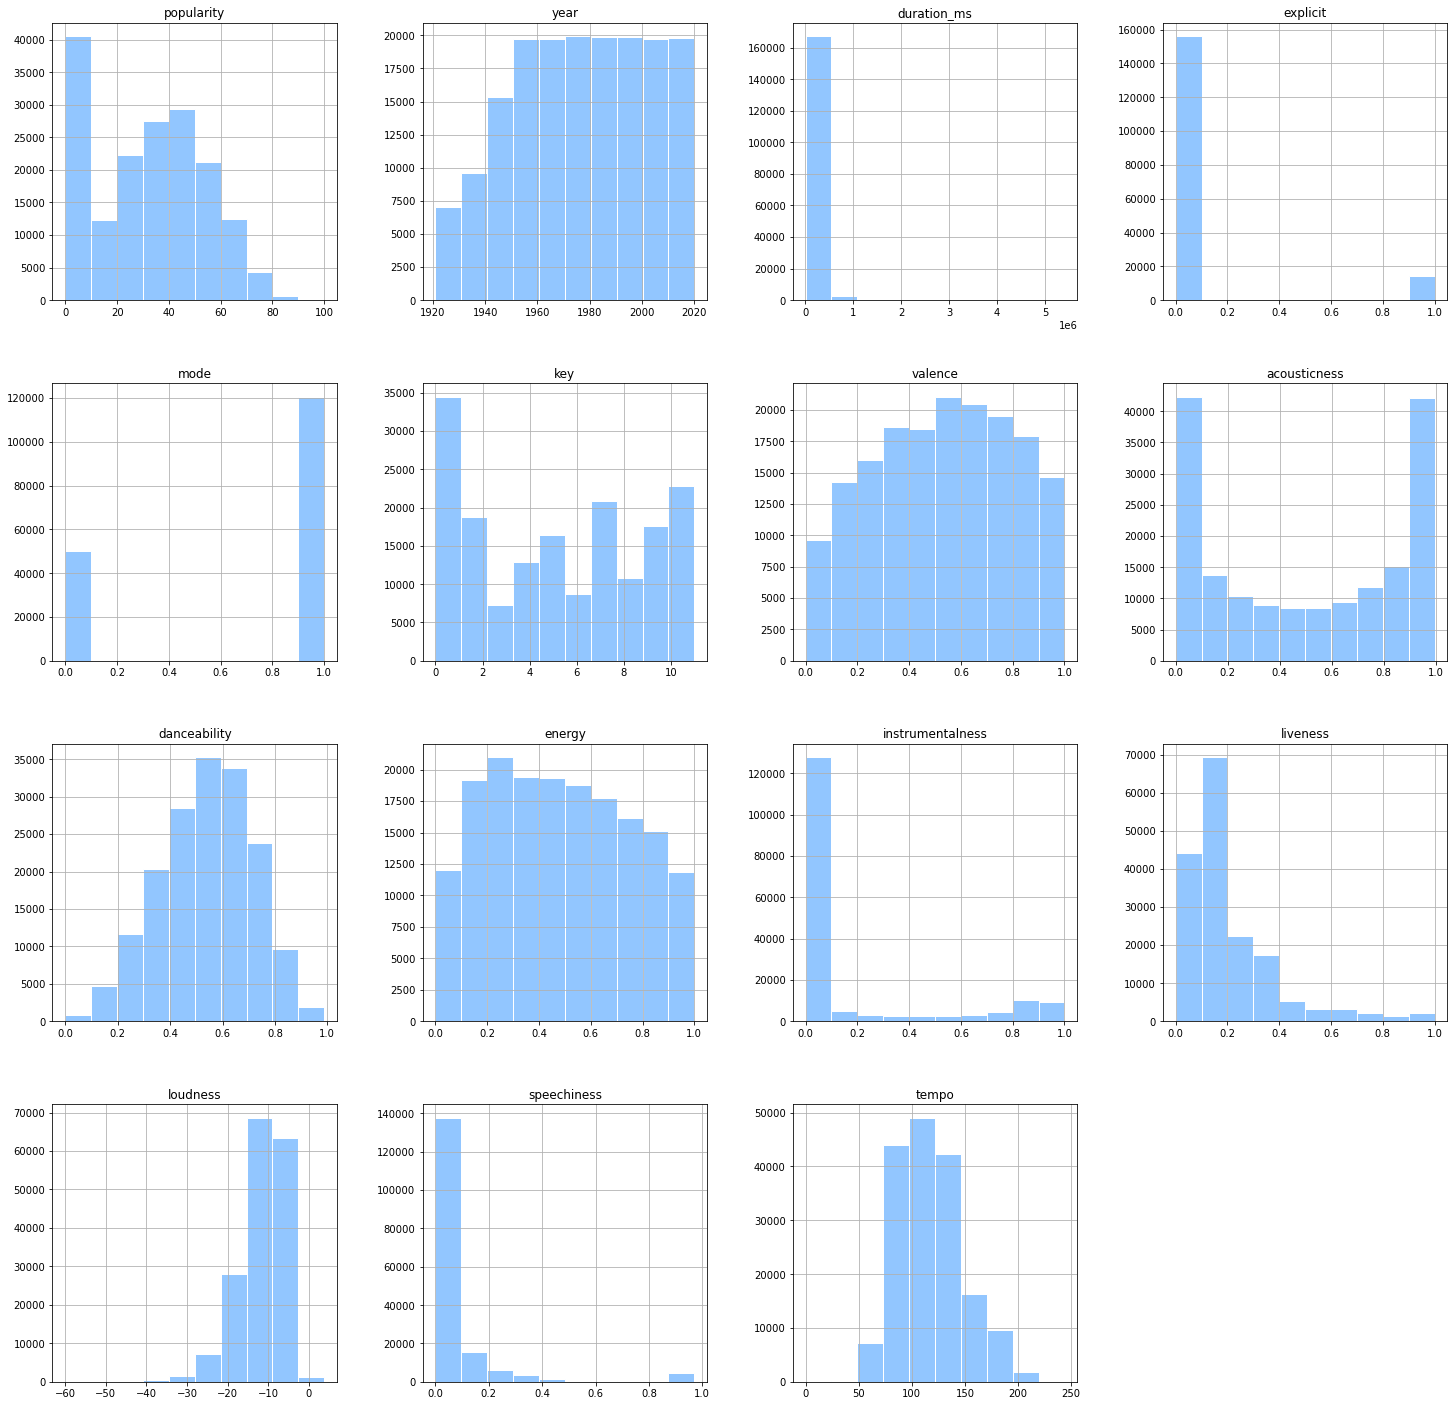

In [14]:
dfClean.hist(figsize=(25,25), edgecolor='#FFFFFF')
plt.show()

### Analysis

## Insights


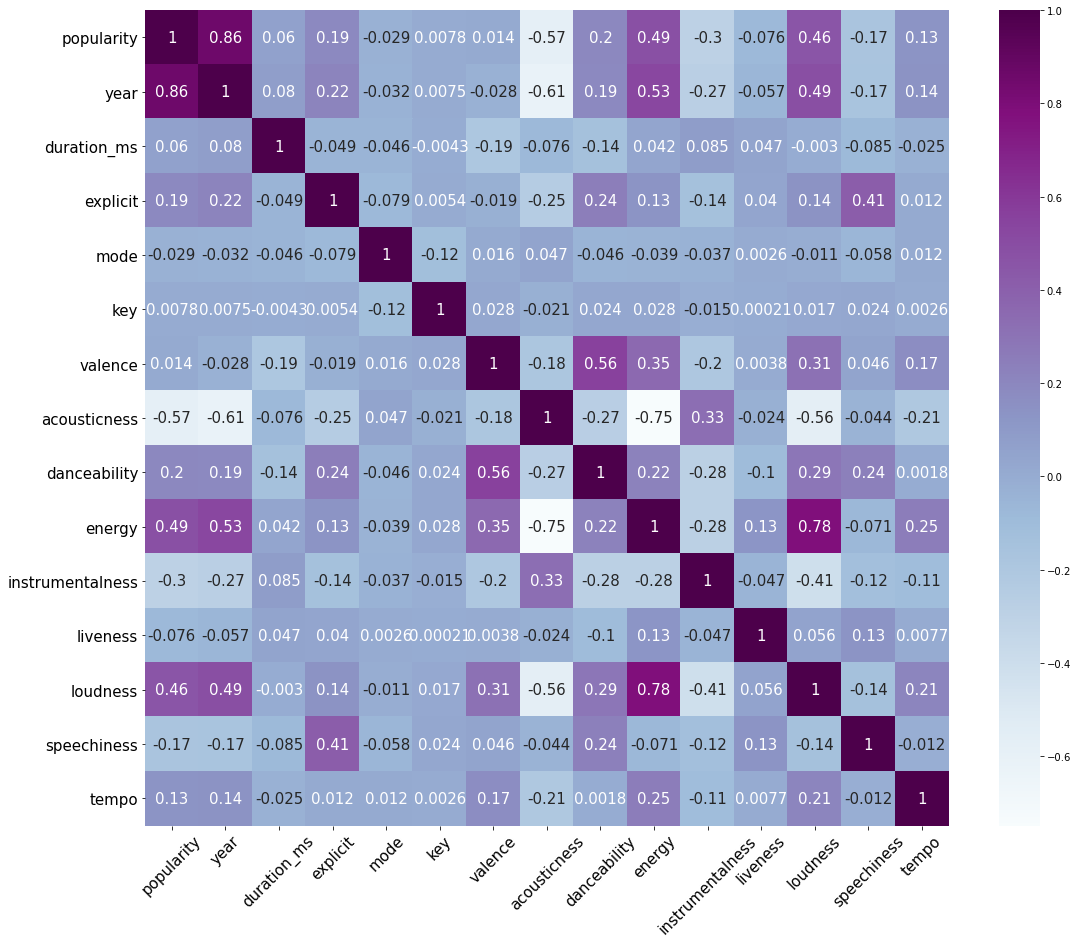

In [15]:
fig, ax = plt.subplots(figsize=(18,15))
ax = sns.heatmap(
    dfClean.corr(),
    cmap='BuPu',
    annot=True,
    annot_kws={"size": 15}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    fontsize=15
)
plt.yticks(fontsize=15)
plt.show()

## Time Series

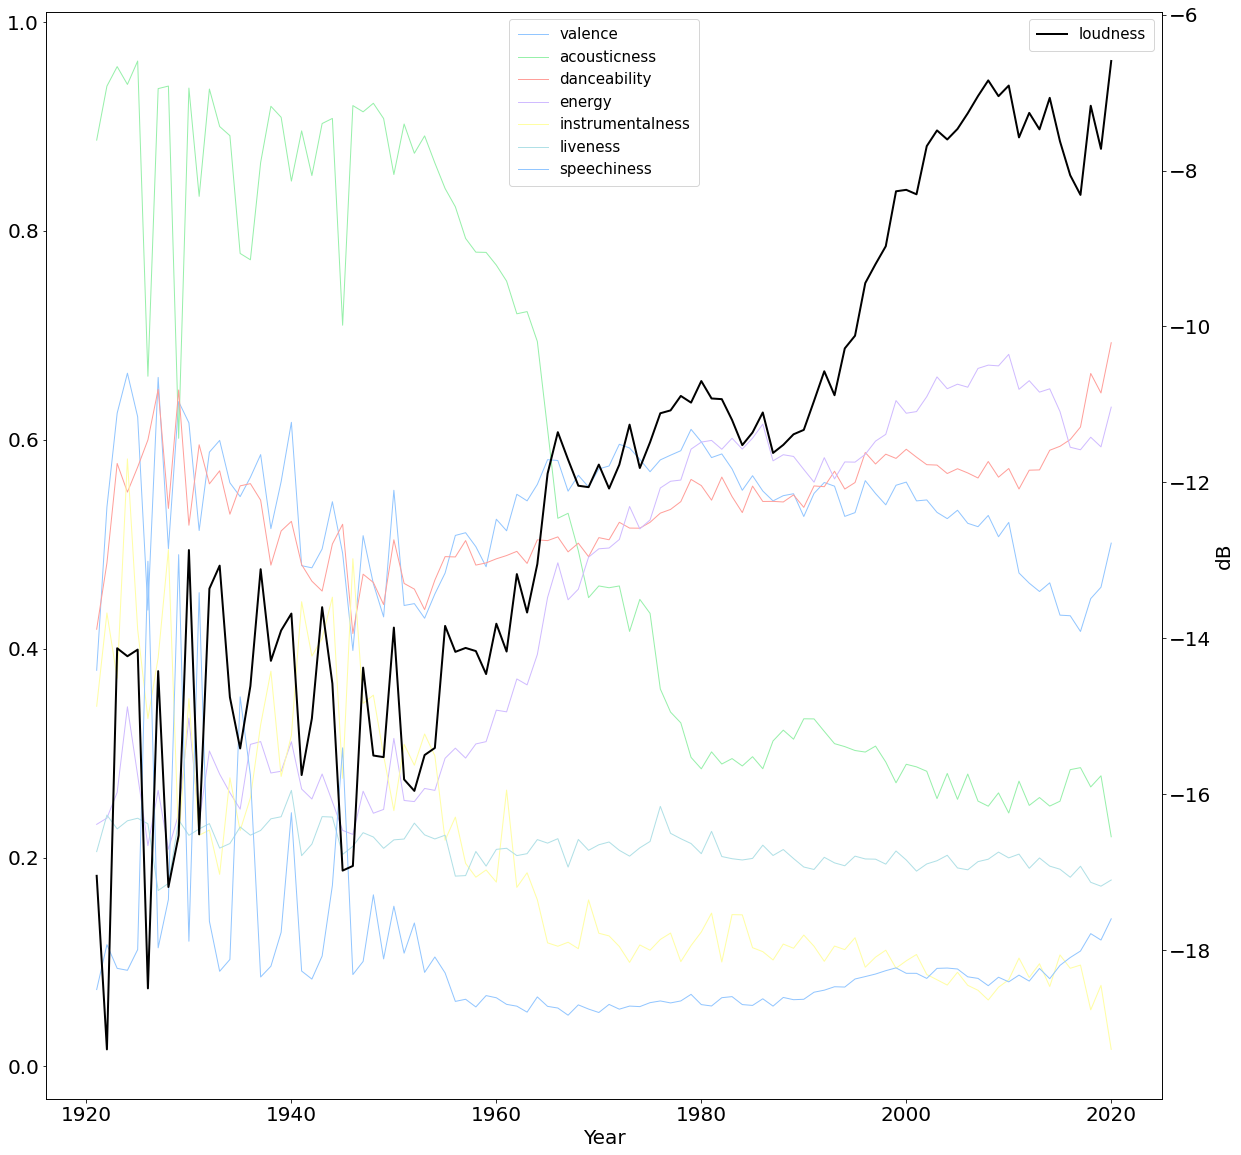

In [16]:
features = [
    'valence',
    'acousticness',
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
    'speechiness',
]
# Initiation
fig, ax1 = plt.subplots(figsize=(20,20))
plt.style.use('seaborn-dark-palette')

# 0 to 1 features
for category in features:
    y = dfClean.groupby('year')[category].mean()
    ax1.plot(dfClean['year'].unique(), y, label=category, linewidth=1)
ax1.set_xlabel('Year', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Loudness Line
ax2 = ax1.twinx()
ax2.plot(dfClean['year'].unique(), dfClean.groupby('year')['loudness'].mean(), label='loudness', linewidth=2, color ='black')
ax2.set_ylabel('dB', fontsize=20)
plt.yticks(fontsize=20)

# Legends
ax1.legend(prop={'size': 15}, borderpad=0.55, labelspacing=0.5, loc=9)
ax2.legend(prop={'size': 15}, borderpad=0.55, labelspacing=0.5, loc='upper right')
plt.show()